In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


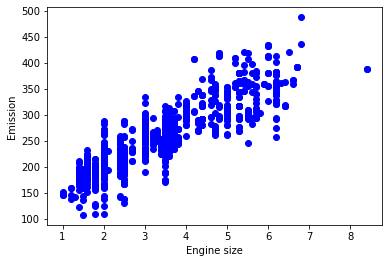

In [4]:
# Let's plot Emission values with respect to Engine size:

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [5]:
# Creating train and test dataset

msk = np.random.rand(len(df))<0.8

train = cdf[msk]
test = cdf[~msk]

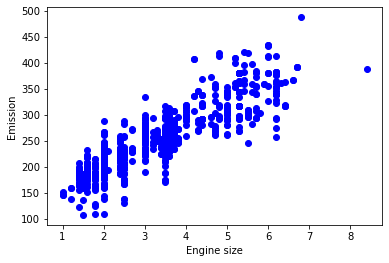

In [6]:
# Train data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Multiple Regression Model
In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression.

In [15]:
from sklearn import linear_model

mlr = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])

mlr.fit(x,y)

# Coefficients
print(mlr.coef_,mlr.intercept_)

[[11.13954492  6.86327945 10.01657141]] [63.22479369]


In [16]:
# Prediction

yhat = mlr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"
      % np.mean((yhat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlr.score(x, y))


Residual sum of squares: 624.61
Variance score: 0.85


In [17]:
# Try to use a multiple linear regression with the same dataset, 
# but this time use FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY 
# instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [18]:
mlr2 = linear_model.LinearRegression()

x1 = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y1 = np.asanyarray(train[['CO2EMISSIONS']])

mlr2.fit(x1,y1)

print(mlr2.coef_,mlr2.intercept_)

[[11.18472439  6.55350576  6.30570495  3.46585587]] [64.17804258]


In [19]:
# Prediction
yhatt = mlr2.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])

x2= np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y2 = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"
      % np.mean((yhatt - y2) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % mlr2.score(x2, y2))

Residual sum of squares: 625.13
Variance score: 0.85
